In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapely

# Function and class def|intions for defining LHC/Lake geometry
from GeometryHelpers import *

In [9]:
LHC_data = pd.read_parquet('Data/LHC_data.parquet')
Lake_data = pd.read_parquet('Data/Lake_data.parquet')

# Define the LHC circle
LHC = Circle(np.array(LHC_data.loc['Point4',['X','Y','Z']]),
             np.array(LHC_data.loc['LHCb',['X','Y','Z']]),
             np.array(LHC_data.loc['Point6',['X','Y','Z']])) # last entry can be Point 2 or 6

# Fix elevation of other LHC interaction points based on LHC circle definition
for k in list(LHC_data.index):
    elev,point = LHC.find_elevation(*np.array(LHC_data.loc[k,['Latitude','Longitude']]))
    LHC_data['Elevation'][k] = elev
    LHC_data.loc[k,['X','Y','Z']] = lat_long_to_xyz(*LHC_data.loc[k,['Latitude','Longitude','Elevation']])

/Users/nickkamp/Documents/Harvard/Research/Ideas/Lake_Geneva_Neutrinos/GeometryHelpers.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dzdx = ((self.n[0]/self.n[1]) * delta[1] - delta[0]) / (delta[2] - self.n[2]/self.n[1] * delta[1])


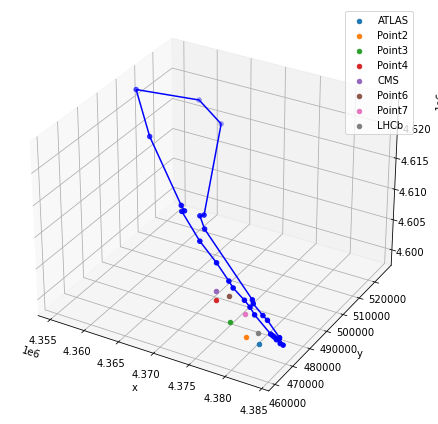

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
for k in list(LHC_data.index):
    ax.scatter(*LHC_data.loc[k,['X','Y','Z']])
x = LHC_data.loc['LHCb',['X','Y','Z']]
dir = LHC.tangent_line(x)
limit=20000
p1 = x-limit*dir
p2 = x+limit*dir
#ax.plot([p1[0],p2[0]],[p1[1],p2[1]],zs=[p1[2],p2[2]],color='black')
ax.scatter(*np.array(Lake_data[['X','Y','Z']]).transpose(),color='blue')
# for point in Lake_data[['X','Y','Z']]:
#     ax.scatter(*point,color='blue')
ax.plot(np.append(Lake_data['X'],Lake_data['X'][0]),
        np.append(Lake_data['Y'],Lake_data['Y'][0]),
        zs=np.append(Lake_data['Z'],Lake_data['Z'][0]),
        color='blue')
plt.legend(list(LHC_data.index))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

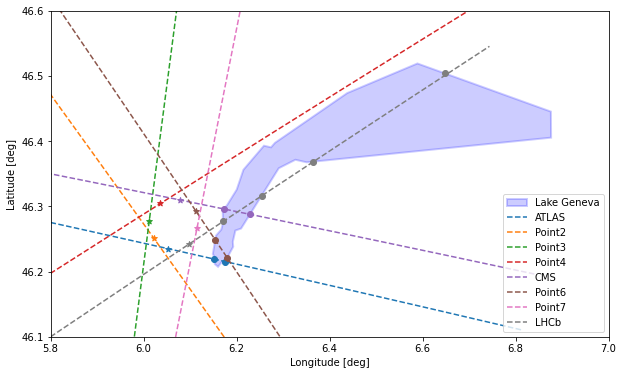

In [11]:
fig = plt.figure(figsize=(10,6))
plt.fill(list(Lake_data['Longitude']) + [Lake_data['Longitude'][0]],
         list(Lake_data['Latitude']) + [Lake_data['Latitude'][0]],
         color='blue',label='Lake Geneva',alpha=0.2,linewidth=2)
Lake_Crossings = {}
for k in list(LHC_data.index):
    Lake_Crossings[k] = []
    center,earth_points = plot_tangent_line_lat_long(LHC, np.array(LHC_data.loc[k,['X','Y','Z']]),limit=60000)
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    plt.plot([p[1] for p in earth_points],
             [p[0] for p in earth_points],color=color,label=k,ls='--')
    plt.scatter(center[1],
                center[0],
                marker='*',color=color)
    int1,int2 = calculate_intersections_with_lake(LHC,
                                                  np.array(LHC_data.loc[k,['X','Y','Z']]),
                                                  np.array(Lake_data[['Latitude','Longitude']]),
                                                  limit=50000000)
    for intersections in (int1,int2):
        if(type(intersections) == shapely.geometry.MultiLineString):
            for intersection in intersections.geoms:
                for coord in list(intersection.coords):
                    Lake_Crossings[k].append(coord)
                    plt.scatter(coord[1],coord[0],color=color)
        else:
            for coord in list(intersections.coords):
                Lake_Crossings[k].append(coord)
                plt.scatter(coord[1],coord[0],color=color)
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.legend(loc='lower right')
plt.xlim(5.8,7.0)
plt.ylim(46.1,46.6)
plt.show()

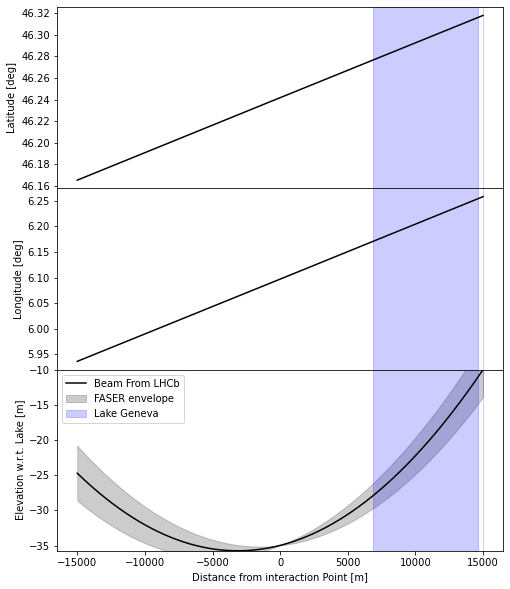

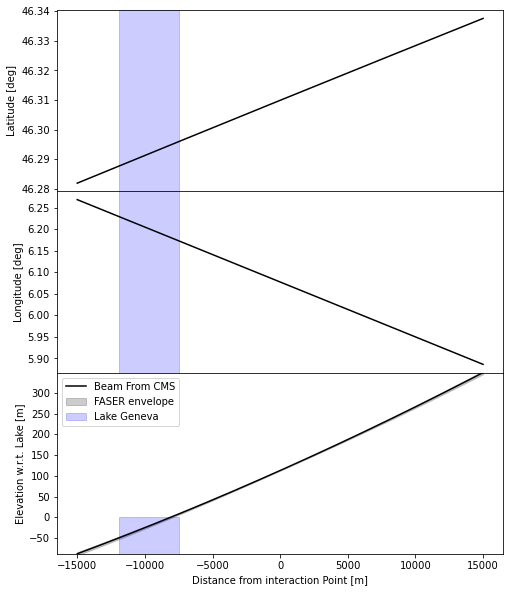

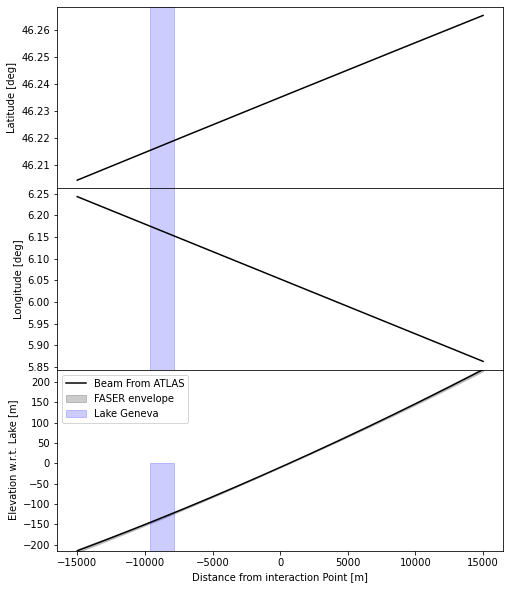

In [13]:
for k in ['LHCb','CMS','ATLAS']:
    plot_tangent_line(LHC,np.array(LHC_data.loc[k,['X','Y','Z']]),limit=15000,Lake_Crossings=Lake_Crossings[k],label='Beam From %s'%k)
    plt.show()

# Crossing Angles

In [7]:
# FASER
half_crossing_angle = 150e-6 #rad
np.tan(half_crossing_angle) * 480

0.07200000054

In [ ]:
6*100